In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

# Constants
IMAGE_SIZE = (224, 224)
SUPPORTED_FORMATS = ['.jpg', '.jpeg', '.png']

In [2]:
def create_binary_mask(image):
    """Create binary mask from image using binary thresholding"""
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply thresholding
    _, binary = cv2.threshold(blurred, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the mask (1 for lesion, 0 for background)
    mask = 1 - binary
    
    # Clean up mask with morphological operations
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    return mask

In [4]:
def process_and_display(image_path):
    img = cv2.imread(str(image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create mask
    mask = create_binary_mask(img)
    
    # Create segmented image
    segmented = img.copy()
    segmented[mask == 0] = 0
    
    # Plot results
    plt.figure(figsize=(20,9))
    
    # Original image
    plt.subplot(2,4,1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    
    # Mask with binary_r colormap
    plt.subplot(2,4,2)
    plt.imshow(mask, cmap=plt.cm.binary_r)
    plt.title('Ground Truth Mask')
    plt.axis('off')
    
    # Segmented result
    plt.subplot(2,4,3)
    plt.imshow(segmented)
    plt.title('Segmented Result')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

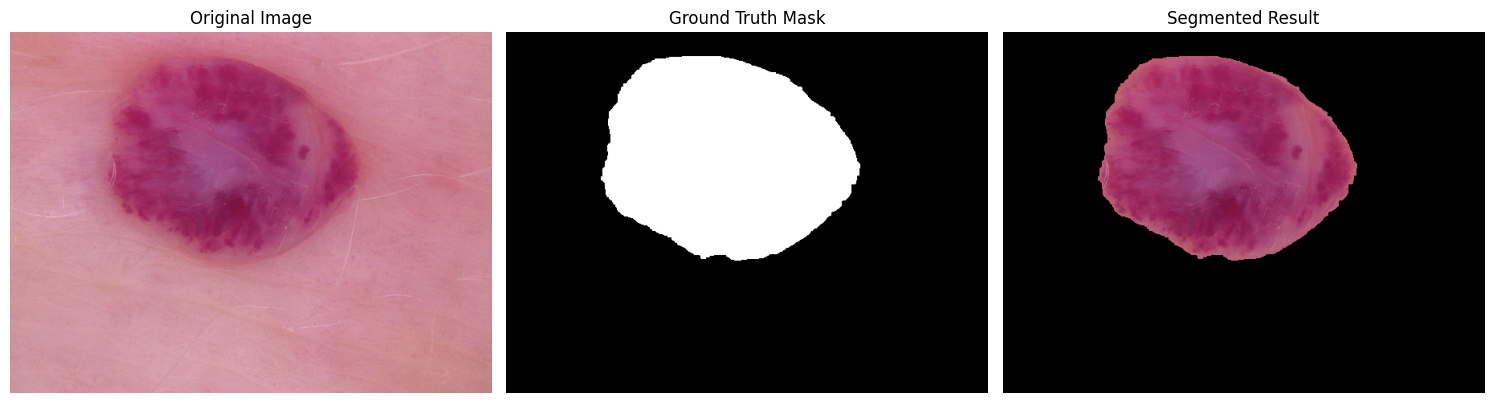

In [5]:
image_path = '/kaggle/input/multiclassskincancer/train_directory/vasc/ISIC_0024370.jpg'
process_and_display(image_path)

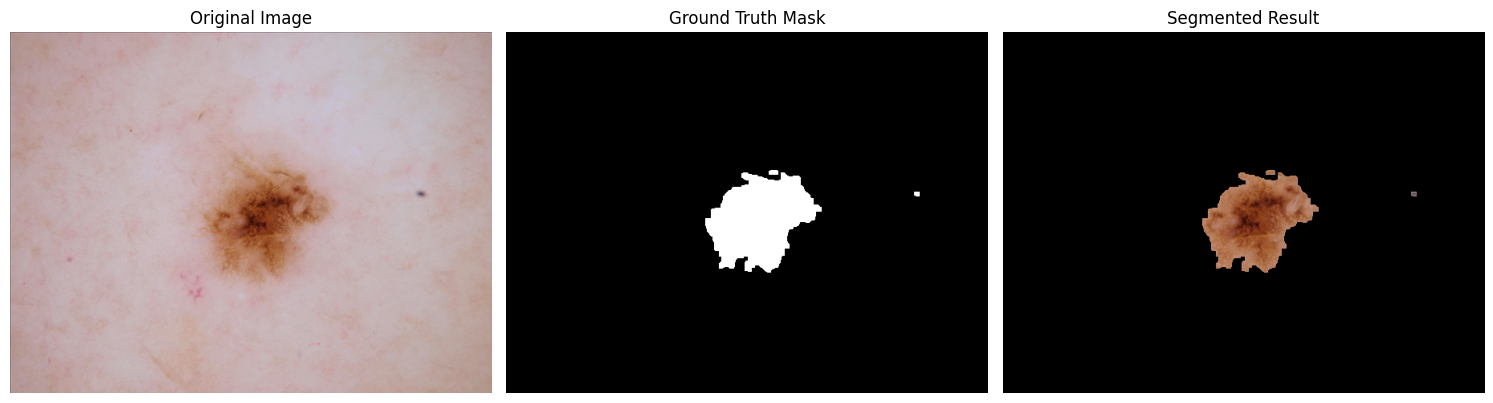

In [6]:
image_path = '/kaggle/input/multiclassskincancer/train_directory/bkl/ISIC_0024612.jpg'
process_and_display(image_path)

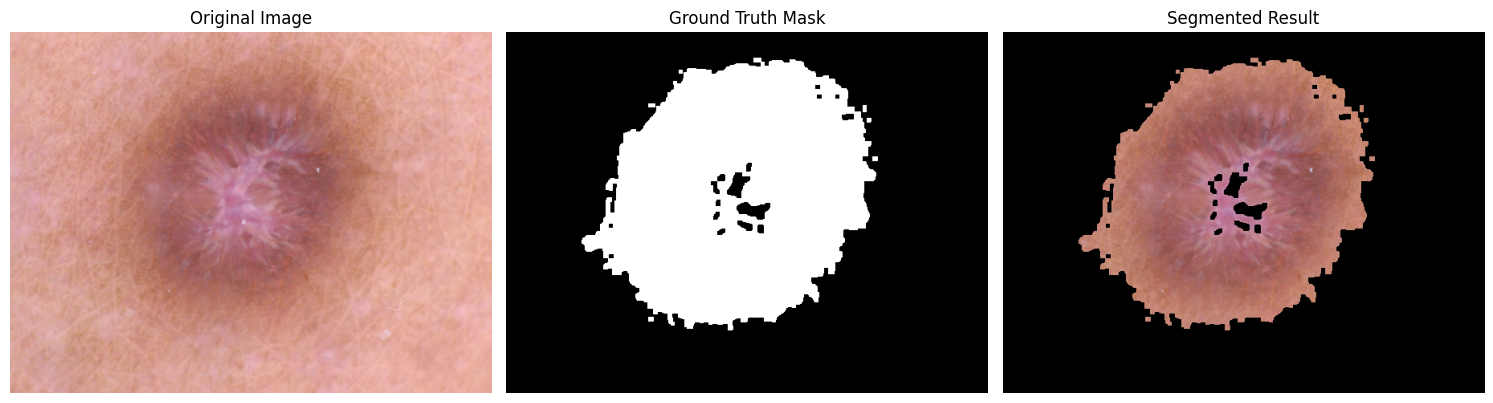

In [7]:
image_path = '/kaggle/input/multiclassskincancer/train_directory/df/ISIC_0024318.jpg'
process_and_display(image_path)